<a href="https://colab.research.google.com/github/YasinnSoylu/actt/blob/main/learningrate_opt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! pip install kaggle

In [ ]:
#! mkdir ~/.kaggle


In [ ]:
#! cp kaggle.json ~/.kaggle/


In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

In [ ]:
#! unzip skin-cancer-mnist-ham10000.zip


In [ ]:
%matplotlib inline
import os, time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.optimizers import Adam , RMSprop ,SGD ,Adadelta , Adagrad , Adamax , Ftrl , Nadam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split


In [ ]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/HAM10000/', '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}      


labels = ['nv','mel','bkl','bcc',"akiec","vasc","df"]

In [ ]:
skin_df = pd.read_csv(os.path.join( '/content/HAM10000/HAM10000_metadata.csv'))


In [ ]:
skin_df['path'] = skin_df['image_id'].map(image_path.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/HAM10000/HAM10000_images_part_1/ISIC_...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/HAM10000/HAM10000_images_part_1/ISIC_...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/HAM10000/HAM10000_images_part_1/ISIC_...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/HAM10000/HAM10000_images_part_1/ISIC_...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/HAM10000/HAM10000_images_part_2/ISIC_...,Benign keratosis-like lesions,2


In [ ]:
skin_df['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

In [ ]:
features=skin_df.drop(columns=['cell_type_idx'],axis=1)
target=skin_df['cell_type_idx']

In [ ]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=42)

x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [ ]:
# Reshape image in 3 dimensions (height = 128px, width = 128px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(32, 32, 3))
x_test = x_test.reshape(x_test.shape[0], *(32, 32, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(32, 32, 3))

In [ ]:
input_shape=(32,32,3)

In [ ]:
num_classes = 7



In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                        

In [ ]:
# Define the optimizer
optimizer = Adam()
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
initial_history=model.fit(x_train,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ])

Epoch 1/100
226/226 [==============================] - 4s 5ms/step - loss: 0.9635 - accuracy: 0.6645 - lr: 0.0010
Epoch 2/100
226/226 [==============================] - 1s 4ms/step - loss: 0.8364 - accuracy: 0.6917 - lr: 0.0011
Epoch 3/100
226/226 [==============================] - 1s 5ms/step - loss: 0.7783 - accuracy: 0.7183 - lr: 0.0012
Epoch 4/100
226/226 [==============================] - 1s 4ms/step - loss: 0.7453 - accuracy: 0.7254 - lr: 0.0013
Epoch 5/100
226/226 [==============================] - 1s 5ms/step - loss: 0.7182 - accuracy: 0.7384 - lr: 0.0014
Epoch 6/100
226/226 [==============================] - 1s 4ms/step - loss: 0.6779 - accuracy: 0.7546 - lr: 0.0015
Epoch 7/100
226/226 [==============================] - 1s 4ms/step - loss: 0.6269 - accuracy: 0.7675 - lr: 0.0016
Epoch 8/100
226/226 [==============================] - 1s 5ms/step - loss: 0.6122 - accuracy: 0.7775 - lr: 0.0017
Epoch 9/100
226/226 [==============================] - 1s 4ms/step - loss: 0.5885 - accu

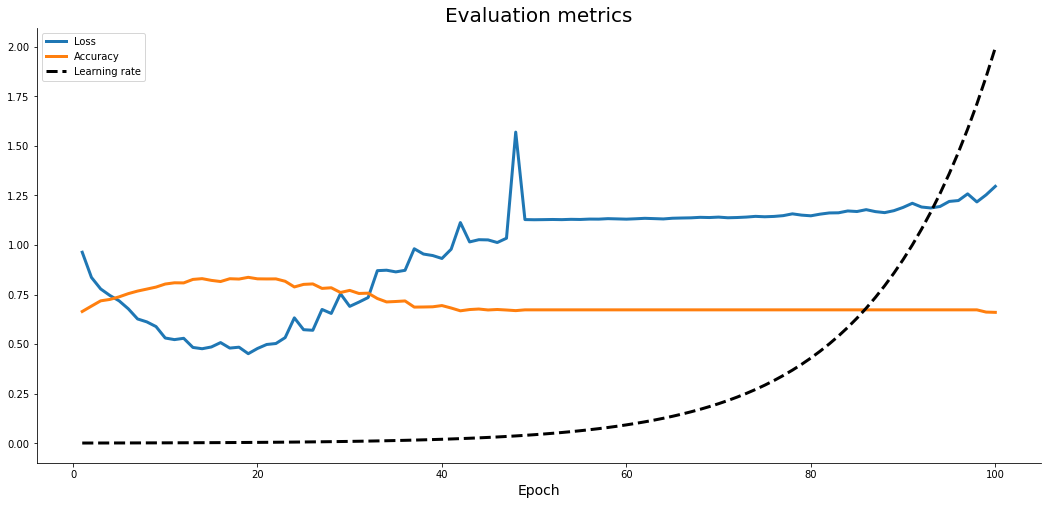

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 101), 
    initial_history.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

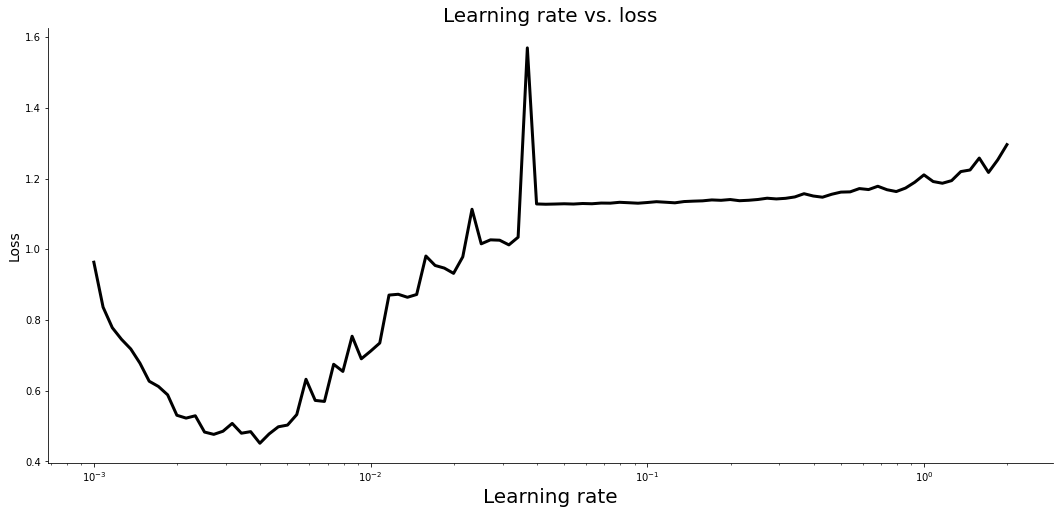

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates, 
    initial_history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=20)
plt.ylabel('Loss', size=14);

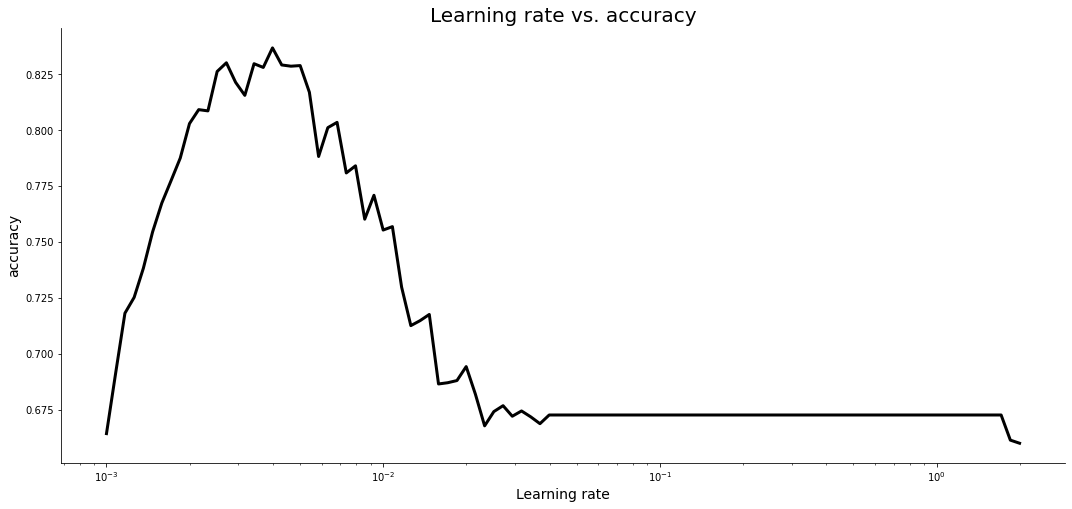

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates, 
    initial_history.history['accuracy'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. accuracy', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('accuracy', size=14);

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                      

In [ ]:
# Define the optimizer
optimizer = Adam(learning_rate=0.005)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history_optimized =model.fit(x_train,
    y_train,
    epochs=100)

Epoch 1/100
226/226 [==============================] - 2s 5ms/step - loss: 1.1183 - accuracy: 0.6648
Epoch 2/100
226/226 [==============================] - 1s 5ms/step - loss: 0.9325 - accuracy: 0.6781
Epoch 3/100
226/226 [==============================] - 1s 4ms/step - loss: 0.8975 - accuracy: 0.6785
Epoch 4/100
226/226 [==============================] - 1s 5ms/step - loss: 0.8762 - accuracy: 0.6860
Epoch 5/100
226/226 [==============================] - 1s 4ms/step - loss: 0.8669 - accuracy: 0.6926
Epoch 6/100
226/226 [==============================] - 1s 5ms/step - loss: 0.8301 - accuracy: 0.7029
Epoch 7/100
226/226 [==============================] - 1s 5ms/step - loss: 0.7944 - accuracy: 0.7101
Epoch 8/100
226/226 [==============================] - 1s 6ms/step - loss: 0.7971 - accuracy: 0.7164
Epoch 9/100
226/226 [==============================] - 1s 5ms/step - loss: 0.7677 - accuracy: 0.7175
Epoch 10/100
226/226 [==============================] - 1s 5ms/step - loss: 0.7496 - accura

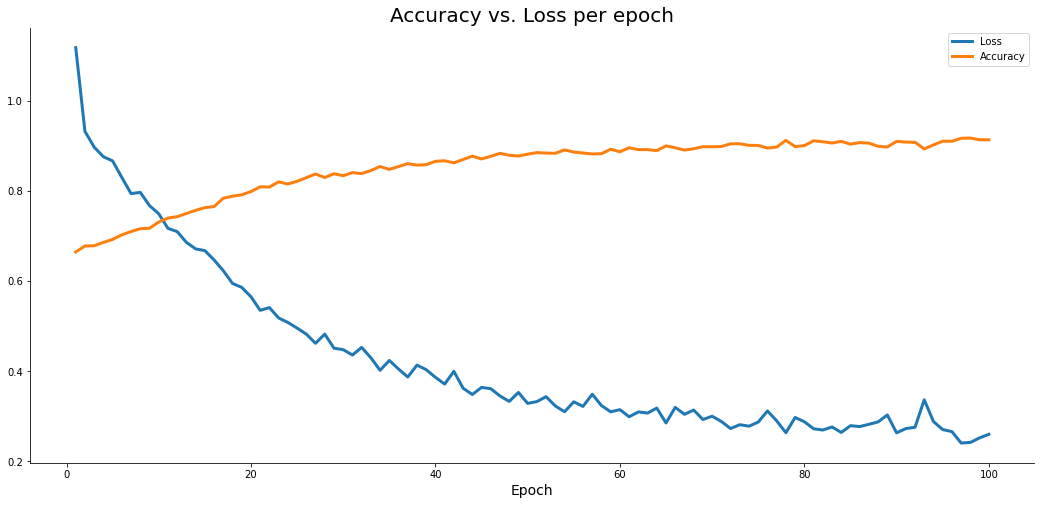

In [ ]:
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()